<a href="https://colab.research.google.com/github/yanarkpanjaitan/sentimentanalysis/blob/main/Analisis_Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS SENTIMEN

## Input Data


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()
data= pd.read_excel('DataGrandsaveroNew.xlsx')
data.head

Saving DataGrandsaveroNew.xlsx to DataGrandsaveroNew.xlsx


<bound method NDFrame.head of                 Nama  ... Label
0               Icha  ...     1
1        Wonderwomen  ...     1
2     Vicky Mahendra  ...     1
3    Susana Fitriani  ...     1
4     IrawanAREMA123  ...     1
..               ...  ...   ...
808       Hikmayanbi  ...     1
809       abdulha304  ...     0
810           Devi R  ...     0
811          Hasan C  ...     0
812         KangEndy  ...     1

[813 rows x 4 columns]>

## Text Preprocessing



In [ ]:
#STEP CLEANING

import string
import re

#Cleaning Tanda Baca
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['Nama_review'] = data['Nama_review'].apply(remove_punctuation)

#Cleaning Angka
def remove_number(text):
    return  re.sub(r"\d+", "", text)
data['Nama_review'] = data['Nama_review'].apply(remove_number)

#Cleaning Spasi depan dan belakang
def remove_whitespace_LT(text):
    return text.strip()
data['Nama_review'] = data['Nama_review'].apply(remove_whitespace_LT)

#Cleaning Double Space
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
data['Nama_review'] = data['Nama_review'].apply(remove_whitespace_multiple)

data['Nama_review']

0      Rekomendasi ini hotelnya pelayanan juga baik p...
1      inap di grandsavero yang tidak disengaja saat ...
2      Suasana Rapat yang tenang dan lokasi strategis...
3      Diklat kali ini berkesan sekali magang sekalig...
4      Bertemu dengan kawan kawan dari Bispar untuk m...
                             ...                        
808    Kami inap di hotel savero tgl checkin Feb dan ...
809    Hotel yang bersih walaupun ukuran kamarnya tid...
810    Liburan kali ini saya keluarga memilih hotel i...
811    Hotel yang sangat nyaman dan pelayanan yang ra...
812    Hotel baru yang sangat bagus dengan interior m...
Name: Nama_review, Length: 813, dtype: object

In [ ]:
#Case Folding

dataCasefolding= data['Nama_review'].str.lower()
dataCasefolding

0      rekomendasi ini hotelnya pelayanan juga baik p...
1      inap di grandsavero yang tidak disengaja saat ...
2      suasana rapat yang tenang dan lokasi strategis...
3      diklat kali ini berkesan sekali magang sekalig...
4      bertemu dengan kawan kawan dari bispar untuk m...
                             ...                        
808    kami inap di hotel savero tgl checkin feb dan ...
809    hotel yang bersih walaupun ukuran kamarnya tid...
810    liburan kali ini saya keluarga memilih hotel i...
811    hotel yang sangat nyaman dan pelayanan yang ra...
812    hotel baru yang sangat bagus dengan interior m...
Name: Nama_review, Length: 813, dtype: object

In [ ]:
#Tokenizing
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
    return word_tokenize(text)
dataToken = dataCasefolding.apply(word_tokenize_wrapper)
dataToken

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [rekomendasi, ini, hotelnya, pelayanan, juga, ...
1      [inap, di, grandsavero, yang, tidak, disengaja...
2      [suasana, rapat, yang, tenang, dan, lokasi, st...
3      [diklat, kali, ini, berkesan, sekali, magang, ...
4      [bertemu, dengan, kawan, kawan, dari, bispar, ...
                             ...                        
808    [kami, inap, di, hotel, savero, tgl, checkin, ...
809    [hotel, yang, bersih, walaupun, ukuran, kamarn...
810    [liburan, kali, ini, saya, keluarga, memilih, ...
811    [hotel, yang, sangat, nyaman, dan, pelayanan, ...
812    [hotel, baru, yang, sangat, bagus, dengan, int...
Name: Nama_review, Length: 813, dtype: object

In [ ]:
#StopWord
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# stopword indonesia
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(['hotel','hotelnya', 'grand','savero', 'grandsavero','mba', 'mbak', 'mas', 'suami', 'ny', 'resort', 'ressort', 'yg','kag','coba',
                       'bogor','dro','li','tgl','feb','cob','nya','mu','ra','kali','aa','aangat','abar','abis','abiss','abaout',
                       'abu','acung','ad','ada','ade','adek','adik','adlh','aga','again','againt','agam','agnes','agus',
                       'agustus','ahh','ahhh','ain','aja','ajah','will','with','wkwk','wkwkwk','xie','xixixi','ya','yaa','yaaa',
                       'yaaaa','yag','yah','yang','yippie','yippy','ynag','you','your','yth','yulis','zefanya','zulfa','zulfikar',
                       'alex','alhamdulillah','alhmdllh','alih','aliny','walopun','wkwkwkw','wouw','wow','xd','yang','sofhia',
                       'ulfah','rizki','fadly','bhari','me','insayaalloh','dian','beberpa','eris','icha','enrico','lippo'])
# convert list to dictionary
list_stopwords = set(list_stopwords)
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataStop = dataToken.apply(stopwords_removal)
dataStop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      [rekomendasi, pelayanan, pemandangannya, kamar...
1      [inap, disengaja, keluarga, acara, keluarga, m...
2      [suasana, rapat, tenang, lokasi, strategis, ke...
3      [diklat, berkesan, magang, inap, pelayanan, me...
4      [bertemu, kawan, kawan, bispar, meraih, target...
                             ...                        
808    [inap, checkin, checkout, kagum, booking, kelu...
809    [bersih, ukuran, kamarnya, luas, kamar, pemand...
810    [liburan, keluarga, memilih, mengisi, liburan,...
811    [nyaman, pelayanan, ramah, bersih, lokasi, str...
812    [bagus, interior, modern, nyaman, inap, staf, ...
Name: Nama_review, Length: 813, dtype: object

In [ ]:
#Stemming
! pip install swifter
! pip install PySastrawi

# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in dataStop:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dataStemming = dataStop.swifter.apply(get_stemmed_term)
dataStemming


     |████████████████████████████████| 296 kB 6.8 MB/s 
     |████████████████████████████████| 118 kB 84.5 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


     |████████████████████████████████| 210 kB 8.7 MB/s 
3546
------------------------
rekomendasi : rekomendasi
pelayanan : layan
pemandangannya : pandang
kamar : kamar
bagus : bagus
kebun : kebun
raya : raya
terimakasih : terimakasih
membersihkan : bersih
melayani : layan
permintaan : minta
inap : inap
disengaja : sengaja
keluarga : keluarga
acara : acara
malam : malam
mencoba : coba
cari : cari
an : an
perjalanan : jalan
rumah : rumah
sukabumi : sukabumi
langsung : langsung
larut : larut
bersyukur : syukur
sayapun : saya
memesan : mes
nama : nama
kaka : kaka
esa : esa
indah : indah
masnya : mas
jaga : jaga
ga : ga
salah : salah
namanya : nama
tri : tri
sigap : sigap
cepat : cepat
kecapean : cape
ramah : ramah
bantu : bantu
rapetin : rapetin
bed : bed
tersisa : sisa
tinggal : tinggal
terpisah : pisah
suasana : suasana
rapat : rapat
tenang : tenang
lokasi : lokasi
strategis : strategis
memuaskan : muas
pilihan : pilih
hidangan : hidang
sarapan : sarap
bersih : bersih
diklat : diklat
b

Pandas Apply:   0%|          | 0/813 [00:00<?, ?it/s]

0      [rekomendasi, layan, pandang, kamar, bagus, ke...
1      [inap, sengaja, keluarga, acara, keluarga, mal...
2      [suasana, rapat, tenang, lokasi, strategis, ke...
3      [diklat, kesan, magang, inap, layan, muas, pil...
4      [temu, kawan, kawan, bispar, raih, target, bai...
                             ...                        
808    [inap, checkin, checkout, kagum, booking, kelu...
809    [bersih, ukur, kamar, luas, kamar, pandang, ke...
810    [libur, keluarga, pilih, isi, libur, keluarga,...
811    [nyaman, layan, ramah, bersih, lokasi, strateg...
812    [bagus, interior, modern, nyaman, inap, staf, ...
Name: Nama_review, Length: 813, dtype: object

In [ ]:
#remove punct
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
data['review'] = dataStemming.apply(lambda x: remove_punct(x))

In [ ]:
data['review']

0      rekomendasi layan pandang kamar bagus kebun ra...
1      inap sengaja keluarga acara keluarga malam cob...
2      suasana rapat tenang lokasi strategis kebun ra...
3      diklat kesan magang inap layan muas pilih hida...
4      temu kawan kawan bispar raih target baik kompe...
                             ...                        
808    inap checkin checkout kagum booking keluarga p...
809    bersih ukur kamar luas kamar pandang kebun ray...
810    libur keluarga pilih isi libur keluarga strate...
811    nyaman layan ramah bersih lokasi strategis ist...
812    bagus interior modern nyaman inap staf ramah b...
Name: review, Length: 813, dtype: object

In [ ]:
data

,Nama,Date,Nama_review,Label,review
0,Icha,Tanggal nginep: Desember 2020,Rekomendasi ini hotelnya pelayanan juga baik p...,1,rekomendasi layan pandang kamar bagus kebun ra...
1,Wonderwomen,Tanggal nginep: November 2020,inap di grandsavero yang tidak disengaja saat ...,1,inap sengaja keluarga acara keluarga malam cob...
2,Vicky Mahendra,Tanggal nginep: November 2020,Suasana Rapat yang tenang dan lokasi strategis...,1,suasana rapat tenang lokasi strategis kebun ra...
3,Susana Fitriani,Tanggal nginep: November 2020,Diklat kali ini berkesan sekali magang sekalig...,1,diklat kesan magang inap layan muas pilih hida...
4,IrawanAREMA123,Tanggal nginep: November 2020,Bertemu dengan kawan kawan dari Bispar untuk m...,1,temu kawan kawan bispar raih target baik kompe...
...,...,...,...,...,...
808,Hikmayanbi,Tanggal nginep: Februari 2016,Kami inap di hotel savero tgl checkin Feb dan ...,1,inap checkin checkout kagum booking keluarga p...
809,abdulha304,Tanggal nginep: Januari 2016,Hotel yang bersih walaupun ukuran kamarnya tid...,0,bersih ukur kamar luas kamar pandang kebun ray...
810,Devi R,Tanggal nginep: Februari 2016,Liburan kali ini saya keluarga memilih hotel i...,0,libur keluarga pilih isi libur keluarga strate...
811,Hasan C,Tanggal nginep: Februari 2016,Hotel yang sangat nyaman dan pelayanan yang ra...,0,nyaman layan ramah bersih lokasi strategis ist...


In [ ]:
data.to_excel("datacleanGrandSavero.xlsx")

## Pembobotan Kata

In [ ]:
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [ ]:
count_words(dataStemming).most_common()

[('kamar', 653),
 ('layan', 520),
 ('inap', 505),
 ('ramah', 486),
 ('enak', 432),
 ('makan', 410),
 ('bagus', 384),
 ('bersih', 368),
 ('nyaman', 358),
 ('sarap', 355),
 ('banget', 305),
 ('staf', 296),
 ('terimakasih', 283),
 ('raya', 266),
 ('kebun', 231),
 ('fasilitas', 220),
 ('lokasi', 216),
 ('strategis', 212),
 ('renang', 196),
 ('keluarga', 187),
 ('kolam', 173),
 ('menu', 155),
 ('pilih', 148),
 ('senang', 143),
 ('bantu', 142),
 ('lengkap', 139),
 ('kota', 130),
 ('variasi', 126),
 ('anak', 124),
 ('muas', 107),
 ('', 107),
 ('pandang', 105),
 ('cepat', 104),
 ('libur', 100),
 ('parkir', 99),
 ('jalan', 96),
 ('luas', 94),
 ('suka', 94),
 ('anakanak', 91),
 ('checkin', 87),
 ('mudah', 81),
 ('sedia', 80),
 ('masuk', 80),
 ('pagi', 78),
 ('ruang', 75),
 ('oke', 73),
 ('mall', 69),
 ('malam', 66),
 ('ok', 65),
 ('indoor', 63),
 ('pas', 63),
 ('variatif', 61),
 ('rekomendasi', 60),
 ('pusat', 60),
 ('puas', 60),
 ('meeting', 59),
 ('langsung', 57),
 ('kesan', 57),
 ('service', 

In [ ]:
#Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(min_df = 1)
df_counted = vector.fit_transform(data['review'])
df_counted = df_counted.toarray()
feature_names = vector.get_feature_names()
feature_counted = pd.DataFrame(df_counted, columns = feature_names)
feature_counted.to_excel('countvectorizerGrandSavero.xlsx')
feature_counted.head(10)

,about,ac,acara,acung,ada,administrasi,adzan,aesthetic,agam,agama,agenda,ain,air,airnav,ajak,ajeng,ajh,aji,aju,aka,akang,akn,aksejuk,akses,aktif,aktifitas,aktivitas,ala,alam,alamat,alami,alas,alat,aldente,alhasil,alih,all,allah,almost,alot,...,wait,waiter,waiters,waitress,waitressnya,wajib,wakil,walawpun,wangi,wanita,want,warmest,warna,was,web,websitewebsite,wedding,weekend,weker,welcome,well,wellcome,western,westernnya,wib,wifi,wifinya,wilayah,wisata,wisatawan,wonderful,work,worth,worthed,wudhu,yakult,yang,yok,zaman,zona
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf = True)
df_tfidf = tfidf_transformer.fit_transform(df_counted)
feature_tfidf = pd.DataFrame(df_tfidf.A, columns = vector.get_feature_names())
feature_tfidf.to_excel('tfidf_GrandSavero.xlsx')
print(np.shape(feature_tfidf))
feature_tfidf

(813, 2814)


,about,ac,acara,acung,ada,administrasi,adzan,aesthetic,agam,agama,agenda,ain,air,airnav,ajak,ajeng,ajh,aji,aju,aka,akang,akn,aksejuk,akses,aktif,aktifitas,aktivitas,ala,alam,alamat,alami,alas,alat,aldente,alhasil,alih,all,allah,almost,alot,...,wait,waiter,waiters,waitress,waitressnya,wajib,wakil,walawpun,wangi,wanita,want,warmest,warna,was,web,websitewebsite,wedding,weekend,weker,welcome,well,wellcome,western,westernnya,wib,wifi,wifinya,wilayah,wisata,wisatawan,wonderful,work,worth,worthed,wudhu,yakult,yang,yok,zaman,zona
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
809,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
810,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
811,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




## Split data Stratified K-Fold (Export data)

In [ ]:
#STRATIFIED 10 FOLD CROSS VALIDATION
#random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama
from sklearn.model_selection import StratifiedKFold

x1 = data['review']
x = feature_tfidf
y = data['Label']
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x1, y)

i = 1
for train_index, test_index in skf.split(x1, y) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train1 ,x_test1=x1.loc[train_index] ,x1.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    i+=1

Fold  1
TRAIN : [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  47  48  49  50  51  53  54  55  57
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77
  80  81  82  84  85  86  87  88  90  91  92  93  94  95  96  97  98  99
 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 119 120 121
 122 123 124 127 128 130 131 132 133 135 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 155 156 157 158 159 160 161 162 164
 165 166 167 168 169 170 172 173 174 175 177 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 238 239 240
 241 242 243 244 245 246 247 248 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 26

In [ ]:
# Export Training Testing
df_xtrain = pd.DataFrame(x_train1)
df_xtrain.columns=['review']
df_xtrain.to_excel("ReviewTrainGrand.xlsx")
df_ytrain = pd.DataFrame(y_train)
df_ytrain.columns=['Label']
df_ytrain.to_excel("LabelTrainGrand.xlsx")

df_xtest = pd.DataFrame(x_test1)
df_xtest.columns=['review']
df_xtest.to_excel("ReviewTestGrand.xlsx")
df_ytest = pd.DataFrame(y_test)
df_ytest.columns=['Label']
df_ytest.to_excel("LabelTestGrand.xlsx")

## SVM Kernel Linear (include SKF) without SMOTE

In [ ]:
import codecs
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_auc_score
from sklearn.metrics import f1_score, roc_curve, auc

In [ ]:
# Fit the model
# Note, available kernels: {‘linear’}
# SVM Linear w/ STRATIFIED 10 FOLD CROSS VALIDATION
i = 1
for train_index, test_index in skf.split(x, y) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train ,x_test=x.loc[train_index] ,x.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    i+=1
    modellin = SVC(kernel='linear', probability=True, C=0.01)
    clf_lin = modellin.fit(x_train, y_train)
    # Predict class labels on training data
    pred_labels_tr = modellin.predict(x_train)
    # Predict class labels on a test data
    pred_labels_te = modellin.predict(x_test)
    cm_train = confusion_matrix(y_train, pred_labels_tr)
    cm_test = confusion_matrix(y_test, pred_labels_te)
    # Use score method to get accuracy of the model
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train, y_train)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test, y_test)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('w = ',clf_lin.coef_)
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function = ', np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  47  48  49  50  51  53  54  55  57
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77
  80  81  82  84  85  86  87  88  90  91  92  93  94  95  96  97  98  99
 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 119 120 121
 122 123 124 127 128 130 131 132 133 135 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 155 156 157 158 159 160 161 162 164
 165 166 167 168 169 170 172 173 174 175 177 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 238 239 240
 241 242 243 244 245 246 247 248 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 26

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.82      1.00      0.90       603

    accuracy                           0.82       731
   macro avg       0.41      0.50      0.45       731
weighted avg       0.68      0.82      0.75       731

--------------------------------------------------------
Accuracy Train = 82.49%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 603]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        68

    accuracy                           0.83        82
   macro avg       0.41      0.50      0.45        82
weighted avg       0.69      0.83      0.75        82

--------------------------------------------------------
Accuracy Test = 82.93%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 68]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.83      1.00      0.90       604

    accuracy                           0.83       731
   macro avg       0.41      0.50      0.45       731
weighted avg       0.68      0.83      0.75       731

--------------------------------------------------------
Accuracy Train = 82.63%
AUC Train:  0.5
CM Train = 
[[  0 127]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.82      1.00      0.90        67

    accuracy                           0.82        82
   macro avg       0.41      0.50      0.45        82
weighted avg       0.67      0.82      0.73        82

--------------------------------------------------------
Accuracy Test = 81.71%
AUC Test:  0.5
CM Test = 
[[ 0 15]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.83      1.00      0.90       604

    accuracy                           0.83       731
   macro avg       0.41      0.50      0.45       731
weighted avg       0.68      0.83      0.75       731

--------------------------------------------------------
Accuracy Train = 82.63%
AUC Train:  0.5
CM Train = 
[[  0 127]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.82      1.00      0.90        67

    accuracy                           0.82        82
   macro avg       0.41      0.50      0.45        82
weighted avg       0.67      0.82      0.73        82

--------------------------------------------------------
Accuracy Test = 81.71%
AUC Test:  0.5
CM Test = 
[[ 0 15]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Fit the model
# Note, available kernels: {‘linear’}
# SVM Linear w/ STRATIFIED 10 FOLD CROSS VALIDATION
i = 1
for train_index, test_index in skf.split(x, y) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train ,x_test=x.loc[train_index] ,x.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    i+=1
    modellin1 = SVC(kernel='linear', probability=True, C=0.1)
    clf_lin = modellin1.fit(x_train, y_train)
    # Predict class labels on training data
    pred_labels_tr = modellin1.predict(x_train)
    # Predict class labels on a test data
    pred_labels_te = modellin1.predict(x_test)
    cm_train = confusion_matrix(y_train, pred_labels_tr)
    cm_test = confusion_matrix(y_test, pred_labels_te)
    # Use score method to get accuracy of the model
    print('----- Evaluation on Training Data -----')
    score_tr = modellin1.score(x_train, y_train)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin1.score(x_test, y_test)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('w = ',clf_lin.coef_)
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function = ', np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  47  48  49  50  51  53  54  55  57
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77
  80  81  82  84  85  86  87  88  90  91  92  93  94  95  96  97  98  99
 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 119 120 121
 122 123 124 127 128 130 131 132 133 135 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 155 156 157 158 159 160 161 162 164
 165 166 167 168 169 170 172 173 174 175 177 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 238 239 240
 241 242 243 244 245 246 247 248 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 26

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.82      1.00      0.90       603

    accuracy                           0.82       731
   macro avg       0.41      0.50      0.45       731
weighted avg       0.68      0.82      0.75       731

--------------------------------------------------------
Accuracy Train = 82.49%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 603]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        68

    accuracy                           0.83        82
   macro avg       0.41      0.50      0.45        82
weighted avg       0.69      0.83      0.75        82

--------------------------------------------------------
Accuracy Test = 82.93%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 68]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.83      1.00      0.90       604

    accuracy                           0.83       731
   macro avg       0.41      0.50      0.45       731
weighted avg       0.68      0.83      0.75       731

--------------------------------------------------------
Accuracy Train = 82.63%
AUC Train:  0.5
CM Train = 
[[  0 127]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.82      1.00      0.90        67

    accuracy                           0.82        82
   macro avg       0.41      0.50      0.45        82
weighted avg       0.67      0.82      0.73        82

--------------------------------------------------------
Accuracy Test = 81.71%
AUC Test:  0.5
CM Test = 
[[ 0 15]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.83      1.00      0.90       604

    accuracy                           0.83       731
   macro avg       0.41      0.50      0.45       731
weighted avg       0.68      0.83      0.75       731

--------------------------------------------------------
Accuracy Train = 82.63%
AUC Train:  0.5
CM Train = 
[[  0 127]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.82      1.00      0.90        67

    accuracy                           0.82        82
   macro avg       0.41      0.50      0.45        82
weighted avg       0.67      0.82      0.73        82

--------------------------------------------------------
Accuracy Test = 81.71%
AUC Test:  0.5
CM Test = 
[[ 0 15]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       128
           1       0.83      1.00      0.90       604

    accuracy                           0.83       732
   macro avg       0.41      0.50      0.45       732
weighted avg       0.68      0.83      0.75       732

--------------------------------------------------------
Accuracy Train = 82.51%
AUC Train:  0.5
CM Train = 
[[  0 128]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.83      1.00      0.91        67

    accuracy                           0.83        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.68      0.83      0.75        81

--------------------------------------------------------
Accuracy Test = 82.72%
AUC Test:  0.5
CM Test = 
[[ 0 14]
 [ 0 67]]
-----------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Fit the model
# Note, available kernels: {‘linear’}
# SVM Linear w/ STRATIFIED 10 FOLD CROSS VALIDATION
i = 1
for train_index, test_index in skf.split(x, y) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train ,x_test=x.loc[train_index] ,x.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    i+=1
    modellin2 = SVC(kernel='linear', probability=True, C=1)
    clf_lin = modellin2.fit(x_train, y_train)
    # Predict class labels on training data
    pred_labels_tr = modellin2.predict(x_train)
    # Predict class labels on a test data
    pred_labels_te = modellin2.predict(x_test)
    cm_train = confusion_matrix(y_train, pred_labels_tr)
    cm_test = confusion_matrix(y_test, pred_labels_te)
    # Use score method to get accuracy of the model
    print('----- Evaluation on Training Data -----')
    score_tr = modellin2.score(x_train, y_train)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin2.score(x_test, y_test)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('w = ',clf_lin.coef_)
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function = ', np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  47  48  49  50  51  53  54  55  57
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77
  80  81  82  84  85  86  87  88  90  91  92  93  94  95  96  97  98  99
 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 119 120 121
 122 123 124 127 128 130 131 132 133 135 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 155 156 157 158 159 160 161 162 164
 165 166 167 168 169 170 172 173 174 175 177 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 238 239 240
 241 242 243 244 245 246 247 248 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 26

In [ ]:
# Fit the model
# Note, available kernels: {‘linear’}
# SVM Linear w/ STRATIFIED 10 FOLD CROSS VALIDATION
i = 1
for train_index, test_index in skf.split(x, y) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train ,x_test=x.loc[train_index] ,x.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    i+=1
    modellin3 = SVC(kernel='linear', probability=True, C=10)
    clf_lin = modellin3.fit(x_train, y_train)
    # Predict class labels on training data
    pred_labels_tr = modellin3.predict(x_train)
    # Predict class labels on a test data
    pred_labels_te = modellin3.predict(x_test)
    cm_train = confusion_matrix(y_train, pred_labels_tr)
    cm_test = confusion_matrix(y_test, pred_labels_te)
    # Use score method to get accuracy of the model
    print('----- Evaluation on Training Data -----')
    score_tr = modellin3.score(x_train, y_train)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin3.score(x_test, y_test)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('w = ',clf_lin.coef_)
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function = ', np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  47  48  49  50  51  53  54  55  57
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77
  80  81  82  84  85  86  87  88  90  91  92  93  94  95  96  97  98  99
 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 119 120 121
 122 123 124 127 128 130 131 132 133 135 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 155 156 157 158 159 160 161 162 164
 165 166 167 168 169 170 172 173 174 175 177 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 238 239 240
 241 242 243 244 245 246 247 248 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 26

In [ ]:
# Fit the model
# Note, available kernels: {‘linear’}
# SVM Linear w/ STRATIFIED 10 FOLD CROSS VALIDATION
i = 1
for train_index, test_index in skf.split(x, y) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train ,x_test=x.loc[train_index] ,x.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    i+=1
    modellin4 = SVC(kernel='linear', probability=True, C=100)
    clf_lin = modellin4.fit(x_train, y_train)
    # Predict class labels on training data
    pred_labels_tr = modellin4.predict(x_train)
    # Predict class labels on a test data
    pred_labels_te = modellin4.predict(x_test)
    cm_train = confusion_matrix(y_train, pred_labels_tr)
    cm_test = confusion_matrix(y_test, pred_labels_te)
    # Use score method to get accuracy of the model
    print('----- Evaluation on Training Data -----')
    score_tr = modellin4.score(x_train, y_train)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin4.score(x_test, y_test)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('w = ',clf_lin.coef_)
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function = ', np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  47  48  49  50  51  53  54  55  57
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77
  80  81  82  84  85  86  87  88  90  91  92  93  94  95  96  97  98  99
 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 119 120 121
 122 123 124 127 128 130 131 132 133 135 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 155 156 157 158 159 160 161 162 164
 165 166 167 168 169 170 172 173 174 175 177 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 238 239 240
 241 242 243 244 245 246 247 248 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 26

In [ ]:
# Export Prediksti Testing
df_ytrain1 = pd.DataFrame(pred_labels_tr)
df_ytrain1.columns=['Label']
df_ytrain1.to_excel("Prediksi_LabelTrainGrand.xlsx")

df_ytest1 = pd.DataFrame(pred_labels_te)
df_ytest1.columns=['Label']
df_ytest1.to_excel("Prediksi_LabelTestGrand.xlsx")

## SVM Kernel Linear with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("Before OverSampling, counts of label 'Positif': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label 'Negatif': {} \n".format(sum(y_train==0)))

print("After OverSampling, counts of label 'Positif': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label 'Negatif': {}".format(sum(y_train_res==0)))

Before OverSampling, the shape of train_X: (732, 2814)
Before OverSampling, the shape of train_y: (732,) 

After OverSampling, the shape of train_X: (1208, 2814)
After OverSampling, the shape of train_y: (1208,) 

Before OverSampling, counts of label 'Positif': 604
Before OverSampling, counts of label 'Negatif': 128 

After OverSampling, counts of label 'Positif': 604
After OverSampling, counts of label 'Negatif': 604


In [ ]:
# Fit the model
# Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# SVM Linear w/ STRATIFIED 10 FOLD CROSS VALIDATION
i = 1
for train_index, test_index in skf.split(x, y) :
    print("Fold ",i)
    x_train ,x_test=x.loc[train_index] ,x.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    i+=1
    model = SVC(kernel='linear', probability=True, C=10)
    clf = model.fit(x_train_res, y_train_res)
    # Predict class labels on training data
    pred_labels_tr = model.predict(x_train_res)
    # Predict class labels on a test data
    pred_labels_te = model.predict(x_test)
    cm_train = confusion_matrix(y_train_res, pred_labels_tr)
    cm_test = confusion_matrix(y_test, pred_labels_te)
    # Use score method to get accuracy of the model
    print('----- Evaluation on Training Data -----')
    score_tr = model.score(x_train_res, y_train_res)
    # Look at classification report to evaluate the model
    print(classification_report(y_train_res, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_res, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = model.score(x_test, y_test)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('--------------------------------------------------------')
    print('w = ',clf.coef_)
    print('b = ',clf.intercept_)
    print('Indices of support vectors = ', clf.support_)
    print('Support vectors = ', clf.support_vectors_)
    print('Number of support vectors for each class = ', clf.n_support_)
    print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

Fold  1
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       1.00      1.00      1.00       604

    accuracy                           1.00      1208
   macro avg       1.00      1.00      1.00      1208
weighted avg       1.00      1.00      1.00      1208

--------------------------------------------------------
Accuracy Train = 100.00%
AUC Train:  1.0
CM Train = 
[[604   0]
 [  0 604]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        68

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

--------------------------------------------------------
Accuracy Test = 100.00%
AUC Test:  1.0
CM Test = 
[[14  0]
 [ 0 68]]
---

# Topic Modeling

## LDA POSITIF

In [ ]:
from google.colab import files
uploaded = files.upload()

review_data= pd.read_excel('Grandsavero_DataTopic.xlsx')
print(review_data.head(5))
print(len(review_data))

Saving Grandsavero_DataTopic.xlsx to Grandsavero_DataTopic (1).xlsx
   Label                                     review_positif
0      1  inap sengaja keluarga acara keluarga malam cob...
1      1  suasana rapat tenang lokasi strategis kebun ra...
2      1  temu kawan kawan bispar raih target baik kompe...
3      1  perlu kerja strategis kota belanja kuliner wis...
4      1  long weekend keluarga putus jalan jalan pilih ...
676


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(min_df = 1)
df_counted = vector.fit_transform(review_data['review_positif'])
df_counted = df_counted.toarray()
feature_names = vector.get_feature_names()
feature_counted = pd.DataFrame(df_counted, columns = feature_names)
feature_counted.to_excel('countvectorizerGrandsaveroPositif.xlsx')
feature_counted.head(10)

,about,ac,acara,acung,ada,adzan,aesthetic,agam,agama,agenda,ain,air,airnav,ajak,ajeng,aji,aka,akang,akn,aksejuk,akses,aktif,aktifitas,aktivitas,ala,alam,alamat,alami,alas,alat,aldente,alih,all,allah,also,ama,aman,amar,amat,amazing,...,virus,visit,visual,voucher,wa,waaahh,wafle,wahh,wait,waiter,waiters,waitress,waitressnya,wajib,wakil,walawpun,wangi,want,warmest,warna,was,web,websitewebsite,wedding,weekend,welcome,well,western,wifi,wifinya,wilayah,wisata,wisatawan,wonderful,work,worth,worthed,yang,zaman,zona
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

dataLDA = review_data['review_positif'].values.tolist()
data_words = list(sent_to_words(dataLDA))

print(data_words[:1])

[['inap', 'sengaja', 'keluarga', 'acara', 'keluarga', 'malam', 'coba', 'cari', 'inap', 'an', 'jalan', 'rumah', 'sukabumi', 'langsung', 'larut', 'malam', 'syukur', 'kamar', 'keluarga', 'saya', 'mes', 'kamar', 'inap', 'nama', 'kaka', 'esa', 'indah', 'terimakasih', 'mas', 'jaga', 'malam', 'ga', 'salah', 'nama', 'tri', 'sigap', 'cepat', 'layan', 'kamar', 'cape', 'bagus', 'layan', 'ramah', 'mas', 'bantu', 'rapetin', 'bed', 'kamar', 'sisa', 'tinggal', 'bed', 'pisah', 'inap']]


In [ ]:
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt
count_words(data_words).most_common()

[('kamar', 483),
 ('layan', 468),
 ('inap', 439),
 ('ramah', 431),
 ('enak', 357),
 ('makan', 350),
 ('nyaman', 309),
 ('bagus', 306),
 ('bersih', 298),
 ('sarap', 290),
 ('banget', 271),
 ('terimakasih', 260),
 ('staf', 256),
 ('raya', 209),
 ('kebun', 186),
 ('fasilitas', 185),
 ('lokasi', 178),
 ('strategis', 177),
 ('keluarga', 161),
 ('renang', 159),
 ('kolam', 141),
 ('senang', 129),
 ('pilih', 125),
 ('menu', 122),
 ('bantu', 119),
 ('lengkap', 118),
 ('kota', 107),
 ('muas', 97),
 ('variasi', 94),
 ('anak', 93),
 ('libur', 87),
 ('pandang', 85),
 ('suka', 83),
 ('cepat', 82),
 ('mudah', 74),
 ('anakanak', 73),
 ('checkin', 69),
 ('masuk', 68),
 ('jalan', 66),
 ('pagi', 66),
 ('luas', 63),
 ('sedia', 63),
 ('ruang', 57),
 ('mall', 56),
 ('malam', 53),
 ('rekomendasi', 53),
 ('indoor', 53),
 ('pas', 52),
 ('langsung', 50),
 ('service', 50),
 ('oke', 50),
 ('puas', 50),
 ('pusat', 49),
 ('meeting', 49),
 ('kesan', 49),
 ('ga', 45),
 ('deh', 45),
 ('ok', 45),
 ('pokok', 44),
 ('tug

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['inap', 'sengaja', 'keluarga', 'acara', 'keluarga', 'malam', 'coba', 'cari', 'inap', 'an', 'jalan', 'rumah', 'sukabumi', 'langsung', 'larut', 'malam', 'syukur', 'kamar', 'keluarga', 'saya', 'mes', 'kamar', 'inap', 'nama', 'kaka', 'esa', 'indah', 'terimakasih', 'mas', 'jaga', 'malam', 'ga', 'salah', 'nama', 'tri', 'sigap', 'cepat', 'layan', 'kamar', 'cape', 'bagus', 'layan', 'ramah', 'mas', 'bantu', 'rapetin', 'bed', 'kamar', 'sisa', 'tinggal', 'bed', 'pisah', 'inap']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
#!python -m spacy download en_core_web_sm

In [ ]:
import spacy

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['inap', 'larut']]


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('inap', 1), ('larut', 1)]]

In [ ]:
#Topic Modeling with Gensim
#Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

#lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=10,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)


In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.088*"main" + 0.071*"book" + 0.052*"anak" + 0.039*"check" + 0.039*"area" + '
  '0.023*"fasilitas" + 0.021*"birthday" + 0.019*"wedding" + 0.015*"sekian" + '
  '0.014*"dinner"'),
 (1,
  '0.119*"inap" + 0.116*"terimakasih" + 0.051*"modern" + 0.036*"wifi" + '
  '0.024*"akse" + 0.023*"rekomendasi" + 0.022*"service" + 0.020*"resepsionis" '
  '+ 0.020*"restaurant" + 0.016*"thank"'),
 (2,
  '0.059*"banget" + 0.057*"terimakasih" + 0.026*"special" + 0.025*"resto" + '
  '0.024*"helpful" + 0.023*"pool" + 0.022*"highly" + 0.019*"poko" + '
  '0.018*"crew" + 0.018*"superior"'),
 (3,
  '0.406*"inap" + 0.078*"prose" + 0.031*"sarap" + 0.029*"very" + '
  '0.023*"fasilitas" + 0.022*"love" + 0.021*"segar" + 0.015*"back" + '
  '0.014*"air" + 0.012*"dsni"'),
 (4,
  '0.137*"banget" + 0.098*"enak" + 0.096*"bagus" + 0.034*"rekomende" + '
  '0.031*"movie" + 0.029*"sarap" + 0.024*"lengkap" + 0.024*"ok" + 0.020*"keep" '
  '+ 0.017*"seminar"'),
 (5,
  '0.176*"variatif" + 0.069*"service" + 0.052*"room" + 0.

In [ ]:
# Coherence Score:  0.5972283642174037
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5972283642174037


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')

    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25),
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5),
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)),
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)

    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)

                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_GrandsaveroPOSITIF.csv', index=False)
    pbar.close()

  0%|          | 0/540 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
100%|██████████| 540/540 [24:27<00:00,  2.72s/it]


In [ ]:
#Coherence Optimum = 0.680629
# Num Topic = 10
# alpha=0.91
# eta=0.01
lda_model1 = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.01)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
from pprint import pprint

# Print the Keyword in the 4 topics optimum
pprint(lda_model1.print_topics())
doc_lda = lda_model1[corpus]

[(0,
  '0.454*"variatif" + 0.133*"sarap" + 0.064*"rekomendasi" + 0.052*"birthday" + '
  '0.043*"taste" + 0.018*"salut" + 0.016*"sih" + 0.016*"suka" + 0.015*"mall" + '
  '0.015*"recommend"'),
 (1,
  '0.349*"inap" + 0.154*"service" + 0.148*"fasilitas" + 0.035*"super" + '
  '0.033*"pool" + 0.032*"restaurant" + 0.028*"cepat" + 0.027*"customer" + '
  '0.026*"double" + 0.012*"dri"'),
 (2,
  '0.276*"banget" + 0.245*"terimakasih" + 0.053*"menu" + 0.049*"ok" + '
  '0.048*"good" + 0.041*"happy" + 0.033*"place" + 0.031*"helpful" + '
  '0.024*"poko" + 0.023*"superior"'),
 (3,
  '0.321*"anak" + 0.178*"main" + 0.078*"inap" + 0.074*"wifi" + 0.062*"kantor" '
  '+ 0.054*"bagu" + 0.026*"bed" + 0.023*"set" + 0.022*"system" + 0.018*"web"'),
 (4,
  '0.142*"indoor" + 0.113*"modern" + 0.109*"komplit" + 0.073*"rekomende" + '
  '0.068*"back" + 0.048*"makan" + 0.048*"time" + 0.042*"keep" + 0.035*"thank" '
  '+ 0.035*"protokol"'),
 (5,
  '0.291*"enak" + 0.199*"book" + 0.127*"full" + 0.049*"mudah" + 0.039*"pokok"

In [ ]:
# Compute Coherence Score
coherence_model_lda1 = CoherenceModel(model=lda_model1, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
print('Coherence Score: ', coherence_lda1)

Coherence Score:  0.6806294257086989


## LSA POSITIF

In [ ]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
def prepare_corpus(data_lemmatized):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(data_lemmatized)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_lemmatized]
    # generate LDA model
    return dictionary,doc_term_matrix

In [ ]:
def create_gensim_lsa_model(data_lemmatized,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(data_lemmatized)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, data_lemmatized, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
# LSA Model
number_of_topics=10
words=10
model=create_gensim_lsa_model(data_lemmatized,number_of_topics,words)

[(0, '-0.924*"inap" + -0.155*"terimakasih" + -0.133*"variatif" + -0.120*"banget" + -0.113*"very" + -0.086*"book" + -0.079*"enak" + -0.073*"bagus" + -0.068*"prose" + -0.057*"fasilitas"'), (1, '0.426*"very" + 0.326*"banget" + 0.321*"enak" + 0.308*"bagus" + -0.304*"inap" + 0.299*"variatif" + 0.293*"recomende" + 0.203*"service" + 0.182*"terimakasih" + 0.141*"sukse"'), (2, '0.465*"banget" + -0.440*"very" + 0.415*"anak" + -0.376*"bagus" + 0.236*"main" + 0.212*"variatif" + 0.142*"sukse" + -0.110*"love" + 0.102*"recomende" + -0.100*"cake"'), (3, '0.572*"variatif" + -0.555*"anak" + -0.302*"main" + 0.222*"recomende" + -0.211*"bagus" + -0.141*"very" + 0.123*"enak" + -0.113*"service" + -0.112*"terimakasih" + 0.100*"sukse"'), (4, '-0.571*"banget" + 0.413*"anak" + 0.387*"variatif" + 0.251*"main" + 0.226*"recomende" + -0.220*"room" + -0.162*"terimakasih" + -0.097*"top" + -0.092*"ok" + -0.085*"dinde"'), (5, '0.496*"terimakasih" + 0.463*"room" + -0.393*"banget" + 0.199*"dinde" + 0.183*"service" + 0.182

In [ ]:
#Coherence Score:  0.5050318542877474
dictionary = corpora.Dictionary(data_lemmatized)
coherencemodel = CoherenceModel(model=model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lsa = coherencemodel.get_coherence()
print('Coherence Score: ', coherence_lsa)

Coherence Score:  0.5050318542877474


In [ ]:
def plot_graph(data_lemmatized,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(data_lemmatized)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,data_lemmatized,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

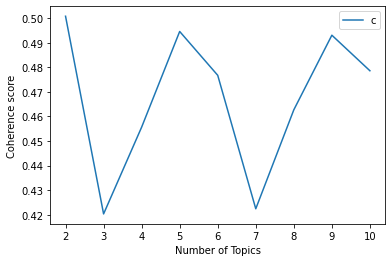

In [ ]:
start,stop,step=2,11,1
plot_graph(data_lemmatized,start,stop,step)

In [ ]:
# LSA Model
number_of_topics1=2
words=10
model1=create_gensim_lsa_model(data_lemmatized,number_of_topics1,words)

[(0, '0.924*"inap" + 0.155*"terimakasih" + 0.133*"variatif" + 0.120*"banget" + 0.113*"very" + 0.086*"book" + 0.079*"enak" + 0.073*"bagus" + 0.068*"prose" + 0.057*"fasilitas"'), (1, '-0.426*"very" + -0.326*"banget" + -0.321*"enak" + -0.308*"bagus" + 0.304*"inap" + -0.299*"variatif" + -0.293*"recomende" + -0.203*"service" + -0.182*"terimakasih" + -0.141*"sukse"')]


In [ ]:
#Coherence Score:  0.520357323230854
coherencemodel1 = CoherenceModel(model=model1, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lsa1 = coherencemodel1.get_coherence()
print('Coherence Score: ', coherence_lsa1)

Coherence Score:  0.520357323230854


# Word Cloud

## WORDCLOUD POSITIF

[('inap sengaja keluarga acara keluarga malam coba cari inap an jalan rumah sukabumi langsung larut malam syukur kamar keluarga saya mes kamar inap nama kaka esa indah terimakasih mas jaga malam ga salah nama tri sigap cepat layan kamar cape bagus layan ramah mas bantu rapetin bed kamar sisa tinggal bed pisah inap', 'suasana rapat tenang lokasi strategis kebun raya layan muas pilih hidang sarap kamar bersih rekomendasi terimakasih'), ('suasana rapat tenang lokasi strategis kebun raya layan muas pilih hidang sarap kamar bersih rekomendasi terimakasih', 'temu kawan kawan bispar raih target baik kompeten giat diklat hotel layan luarbiasa temu makna kawan giat diklat kamar bersih menu makan saji lezat lahir chef handal terimakasih mantap kawan depan'), ('temu kawan kawan bispar raih target baik kompeten giat diklat hotel layan luarbiasa temu makna kawan giat diklat kamar bersih menu makan saji lezat lahir chef handal terimakasih mantap kawan depan', 'perlu kerja strategis kota belanja kuli

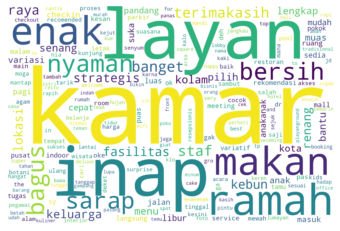

In [ ]:
data1 = review_data['review_positif']
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS

bigrams_list = list(nltk.bigrams(data1))
print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,background_color="white",stopwords=list_stopwords)
wordCloud.generate_from_frequencies(words_dict)
#plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_unigram.jpg')

[('inap sengaja keluarga acara keluarga malam coba cari inap an jalan rumah sukabumi langsung larut malam syukur kamar keluarga saya mes kamar inap nama kaka esa indah terimakasih mas jaga malam ga salah nama tri sigap cepat layan kamar cape bagus layan ramah mas bantu rapetin bed kamar sisa tinggal bed pisah inap', 'suasana rapat tenang lokasi strategis kebun raya layan muas pilih hidang sarap kamar bersih rekomendasi terimakasih'), ('suasana rapat tenang lokasi strategis kebun raya layan muas pilih hidang sarap kamar bersih rekomendasi terimakasih', 'temu kawan kawan bispar raih target baik kompeten giat diklat hotel layan luarbiasa temu makna kawan giat diklat kamar bersih menu makan saji lezat lahir chef handal terimakasih mantap kawan depan'), ('temu kawan kawan bispar raih target baik kompeten giat diklat hotel layan luarbiasa temu makna kawan giat diklat kamar bersih menu makan saji lezat lahir chef handal terimakasih mantap kawan depan', 'perlu kerja strategis kota belanja kuli

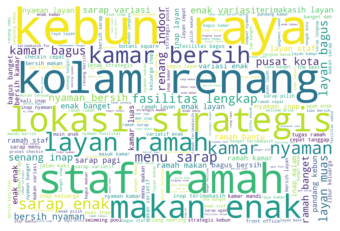

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS

bigrams_list = list(nltk.bigrams(data1))
print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, background_color="white", stopwords=list_stopwords)
wordCloud.generate_from_frequencies(words_dict)
#plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_bigram.jpg')

# CountVectorizer NEGATIF

In [ ]:
from google.colab import files
uploaded = files.upload()

review_data1= pd.read_excel('Grandsavero_DataTopic1.xlsx')
print(review_data1.head(5))
print(len(review_data1))

Saving Grandsavero_DataTopic1.xlsx to Grandsavero_DataTopic1 (1).xlsx
   Label                                     review_negatif
0      0  lokasi super strategis menit jalan kaki botani...
1      0  libur minggu keluarga badmood pool pic incharg...
2      0  hobi olah raga jalan kaki cocok inap letak keb...
3      0  lokasi strategis kebun raya jamu meeting enak ...
4      0  makan variasi bubur roti dll staf ramah cepat ...
137


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(min_df = 1)
df_counted = vector.fit_transform(review_data1['review_negatif'])
df_counted = df_counted.toarray()
feature_names = vector.get_feature_names()
feature_counted = pd.DataFrame(df_counted, columns = feature_names)
feature_counted.to_excel('countvectorizerGrandsaveroNegatif.xlsx')
feature_counted.head(10)

,ac,acara,acung,administrasi,agam,air,ajak,ajh,aju,akses,aktif,alam,alami,alat,alhasil,all,almost,alot,am,aman,amar,ambience,ambil,amenitiesnya,an,anak,anakanak,and,aneh,aneka,angin,angkot,angsa,another,antar,apa,apologize,appreciate,apresiasi,arah,...,umur,unik,uniq,unique,unjung,untung,uograde,upgrade,urus,usaha,usang,user,utama,valet,vallet,varian,variant,variasi,variatif,via,victoria,vintage,waflenya,wangi,wanita,warna,weekend,weker,welcome,well,wellcome,western,westernnya,wib,wifi,wilayah,wisata,wudhu,yakult,yok
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = review_data1['review_negatif'].values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1])

[['lokasi', 'super', 'strategis', 'menit', 'jalan', 'kaki', 'botani', 'square', 'rumah', 'sakit', 'supermarket', 'all', 'segar', 'toko', 'rainbow', 'cake', 'bahan', 'factory', 'outlet', 'restoran', 'delivery', 'makan', 'pool', 'indoor', 'bebas', 'renang', 'khawatir', 'hujan', 'pool', 'aman', 'anak', 'renang', 'fasilitas', 'kamar', 'lengkap', 'ga', 'chiller', 'bintang', 'bathroomnya', 'desain', 'vintage', 'spot', 'foto', 'manajemen', 'sedia', 'fasilitas', 'sepeda', 'harga', 'rp', 'jam', 'bagus', 'manajemen', 'peluang', 'trend', 'gowes', 'parkir', 'sempit', 'kamar', 'kedap', 'suara']]


In [ ]:
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt
count_words(data_words).most_common()

[('kamar', 170),
 ('bagus', 78),
 ('enak', 75),
 ('bersih', 70),
 ('inap', 66),
 ('sarap', 65),
 ('makan', 60),
 ('parkir', 58),
 ('raya', 57),
 ('ramah', 55),
 ('layan', 52),
 ('nyaman', 49),
 ('kebun', 45),
 ('staf', 40),
 ('lokasi', 38),
 ('renang', 37),
 ('strategis', 35),
 ('fasilitas', 35),
 ('banget', 34),
 ('menu', 33),
 ('kolam', 32),
 ('variasi', 32),
 ('anak', 31),
 ('luas', 31),
 ('jalan', 30),
 ('keluarga', 26),
 ('terimakasih', 24),
 ('pilih', 23),
 ('oke', 23),
 ('kota', 23),
 ('bantu', 23),
 ('cepat', 22),
 ('lumayan', 22),
 ('lengkap', 21),
 ('pandang', 20),
 ('ok', 20),
 ('ruang', 18),
 ('anakanak', 18),
 ('checkin', 18),
 ('sedia', 17),
 ('variatif', 17),
 ('kalo', 17),
 ('mandi', 17),
 ('wifi', 14),
 ('akses', 14),
 ('tamu', 14),
 ('senang', 14),
 ('suara', 13),
 ('libur', 13),
 ('air', 13),
 ('malam', 13),
 ('mall', 13),
 ('saran', 13),
 ('kaki', 12),
 ('tugas', 12),
 ('masuk', 12),
 ('pagi', 12),
 ('suka', 12),
 ('ga', 11),
 ('sempit', 11),
 ('tambah', 11),
 ('tp'